In [11]:
import numpy as np
import pandas as pd

In [12]:
url1 = '/kaggle/input/abaqus/Abaqus DEA data/Displacement-vs-time.xlsx'
df1=pd.read_excel(url1)
df1 = df1.dropna()


url2 = '/kaggle/input/abaqus/Abaqus DEA data/strain-energy-vs-time.xlsx'
df2=pd.read_excel(url2)
df2 = df2.dropna()


url3 = '/kaggle/input/abaqus/Abaqus DEA data/Frictional-energy-vs-time.xlsx'
df3=pd.read_excel(url3)
df3 = df3.dropna()



url4 = '/kaggle/input/abaqus/Abaqus DEA data/Reaction-force-vs-time.xlsx'
df4=pd.read_excel(url4)
#df4.drop(df4.tail(1).index,inplace=True)
df4 = df4.dropna()


url5 = '/kaggle/input/abaqus/Abaqus DEA data/Static-dissipation-energy-vs-time.xlsx'
df5=pd.read_excel(url5)
df5 = df5.dropna()


url6 = '/kaggle/input/abaqus/Abaqus DEA data/Viscous-dissipation-energy-vs-time.xlsx'
df6 =pd.read_excel(url6)
df6 = df6.dropna()

#print(df1.shape, df2.shape, df3.shape, df4.shape, df5.shape, df6.shape)
# 

In [13]:
df1.head()

,Time,Displacement
0,0.0000,-0.053377
1,0.0625,-0.132421
2,0.1250,-0.239230
3,0.1875,-0.362351
4,0.2500,-0.491532


In [14]:
df2.head()

,Time,Energy
0,0.00,0.927835
1,0.25,1.883997
2,0.50,2.838692
3,0.75,3.422467
4,1.00,3.579944


In [15]:
df3.head()

,Time,Energy
0,0.0000,0.009749
1,0.0625,0.072360
2,0.1250,0.183624
3,0.1875,0.343757
4,0.2500,0.546081


In [16]:
df4.head()

,Time,Force
0,0.0000,-1.429195
1,0.0625,-0.877401
2,0.1250,1.870358
3,0.1875,8.067696
4,0.2500,17.825207


In [17]:
df5.head()

,Time,Energy
0,0.0000,0.599600
1,0.0625,2.422608
2,0.1250,5.420887
3,0.1875,9.535218
4,0.2500,14.572278


In [18]:
df6.head()

,Time,Energy
0,0.0000,0.005916
1,0.0625,0.010370
2,0.1250,0.014255
3,0.1875,0.016674
4,0.2500,0.017686


In [19]:
import matplotlib.pyplot as plt

def plot(df1,df2, df3, df4, df5, df6):
    fig, ax = plt.subplots()
    fig.subplots_adjust(right=0.75)

    twin1 = ax.twinx()
    twin2 = ax.twinx()
    twin3 = ax.twinx()
    twin4 = ax.twinx()
    twin5 = ax.twinx()
    

    # Offset the right spine of twin2.  The ticks and label have already been
    # placed on the right by twinx above.
    twin2.spines.right.set_position(("axes", 1.2))
    
#     twin1.spines['right'].set_position(('outward', 40))

    p1, = ax.plot(df1['Time'], df1['Displacement'], "r--", linewidth=2.5, label="Left sensor value")
    p2, = twin1.plot(df2['Time'], df2['Energy'], "b--", linewidth=2.5, label="Right sensor value")
    p3, = twin2.plot(df3['Time'], -df3['Energy'], "g--", linewidth=2.5, label="Left sensor value")
    p4, = twin3.plot(df4['Time'], df4['Force'], "c--", linewidth=2.5, label="Right sensor value")
    p5, = twin4.plot(df5['Time'], df5['Energy'], "y--",linewidth=2.5, label="Left sensor value")
    p6, = twin5.plot(df6['Time'], df6['Energy'], "m--",linewidth=2.5, label="Right sensor value")
    
    ax.set_xlim(min(df1['Time']), max(df1['Time']))
    ax.set_ylim(min(df1['Displacement']), max(df1['Displacement']))
    twin1.set_ylim(min(df2['Energy']), max(df2['Energy']))
    twin2.set_ylim(min(-df3['Energy']), max(-df3['Energy']))
    twin3.set_ylim(min(df4['Force']), max(df4['Force']))
    twin4.set_ylim(min(df5['Energy']), max(df5['Energy']))
    twin5.set_ylim(min(df6['Energy']), max(df6['Energy']))
#     twin5.set_ylim(min(df1['Velocity field, y component (m/s), Point: 8']), max(df1['Velocity field, y component (m/s), Point: 8']))

    ax.set_xlabel("Time (Sec)", fontsize=24)
    ax.set_ylabel("Wing displacement (cm)", fontsize=24)
    twin1.set_ylabel("Strain Energy (J)", fontsize=24)
    twin2.set_ylabel("Frictional Energy (J)", fontsize=24)
    twin3.set_ylabel("Reaction force (N)", fontsize=24)
    twin4.set_ylabel("Stat. Diss. Energy (J)", fontsize=24)
    twin5.set_ylabel("Vis. Diss. Energy (J)", fontsize=24)

    ax.yaxis.label.set_color(p1.get_color())
    twin1.yaxis.label.set_color(p2.get_color())
    twin2.yaxis.label.set_color(p3.get_color())
    twin3.yaxis.label.set_color(p4.get_color())
    twin4.yaxis.label.set_color(p5.get_color())
    twin5.yaxis.label.set_color(p6.get_color())
    #twin6.yaxis.label.set_color(p3.get_color())
    twin1.spines['right'].set_position(('outward', 0))
    twin2.spines['right'].set_position(('outward', 117))
    twin3.spines['right'].set_position(('outward', 260))
    twin4.spines['right'].set_position(('outward', 380))
    twin5.spines['right'].set_position(('outward', 498))


    tkw = dict(size=4, width=1.5)
    ax.tick_params(axis='y', colors=p1.get_color(), **tkw)
    twin1.tick_params(axis='y', colors=p2.get_color(), **tkw)
    twin2.tick_params(axis='y', colors=p3.get_color(), **tkw)
    twin3.tick_params(axis='y', colors=p4.get_color(), **tkw)
    twin4.tick_params(axis='y', colors=p5.get_color(), **tkw)
    twin5.tick_params(axis='y', colors=p6.get_color(), **tkw)
    ax.tick_params(axis='x', **tkw)
    
    for tick1 in ax.get_xticklabels():
        tick1.set_fontsize(28)
    for tick2 in ax.get_yticklabels():
        tick2.set_fontsize(28)
    for tick3 in twin1.get_yticklabels():
        tick3.set_fontsize(28)
    for tick4 in twin2.get_yticklabels():
        tick4.set_fontsize(28)
    for tick5 in twin3.get_yticklabels():
        tick5.set_fontsize(28)
    for tick6 in twin4.get_yticklabels():
        tick6.set_fontsize(28)
    for tick7 in twin5.get_yticklabels():
        tick7.set_fontsize(28)
        
#     ax.set_yticks(np.arange(0, 91, 30))
#     ax.set_xticks(np.arange(0, 21, 10))
#     twin2.set_yticks(np.arange(50, 91, 20))
    twin5.set_yticks(np.arange(0.005, 0.02, 3))

#     ax.set_xlim(min(df1['Time']), max(df1['Time']))
#     ax.set_ylim(min(df1['Displacement']), max(df1['Displacement']))
#     twin1.set_ylim(min(df2['Energy']), max(df2['Energy']))
#     twin2.set_ylim(min(-df3['Energy']), max(-df3['Energy']))
#     twin3.set_ylim(min(df4['Force']), max(df4['Force']))
#     twin4.set_ylim(min(df5['Energy']), max(df5['Energy']))
      #twin5.set_ylim(min(df6['Energy']), max(df6['Energy']))
    
    ax.set_xticks(np.arange(min(df1['Time']), max(df1['Time']+0.1), (max(df1['Time'])-min(df1['Time']))/3))
    ax.set_yticks(np.arange(min(df1['Displacement']), max(df1['Displacement']+0.5),  (max(df1['Displacement'])-min(df1['Displacement']))/3))
    twin1.set_yticks(np.arange(min(df2['Energy']), max(df2['Energy']+1),  (max(df2['Energy'])-min(df2['Energy']))/3))
    twin2.set_yticks(np.arange(min(-df3['Energy']), max(-df3['Energy']+1),  (max(-df3['Energy'])-min(-df3['Energy'])/3)))
    twin3.set_yticks(np.arange(min(df4['Force']), max(df4['Force']+1),  (max(df4['Force'])-min(df4['Force']))/3))
    twin4.set_yticks(np.arange(min(df5['Energy']), max(df5['Energy']+1),  (max(df5['Energy'])-min(df5['Energy']))/3))

    twin5.set_yticks(np.arange(min(df6['Energy']), max(df6['Energy']+0.01),  (max(df6['Energy'])-min(df6['Energy']))/1.5))
    #twin4.set_yticks(np.arange(min(df5['Energy']), max(df5['Energy']),  (max(df5['Energy'])-min(df5['Energy']))/6))
    
    ax.set_xticks([0.0, 0.5, 1.0])
    ax.set_yticks([-1.7, -0.82, -0.06])
    twin1.set_yticks([0.90,2.6, 4.5])
    twin2.set_yticks([-4.0,-2.0, 0.0])
    twin3.set_yticks([-2.0, 40.0, 78.0])
    twin4.set_yticks([0.0, 48.0, 96.0])
    twin5.set_yticks([0.005, 0.017, 0.030])
#     twin3.set_yticks(min(df4['Force']), max(df4['Force']))
#     twin4.set_yticks(min(df5['Energy']), max(df5['Energy']))
#     twin5.set_yticks(min(df6['Energy']), max(df6['Energy']))
    
    #ax.legend(handles=[p1, p2, p3, p4, p5, p6], loc='lower left')
    #ax.set_title("FEA Analysis")

    plt.show()

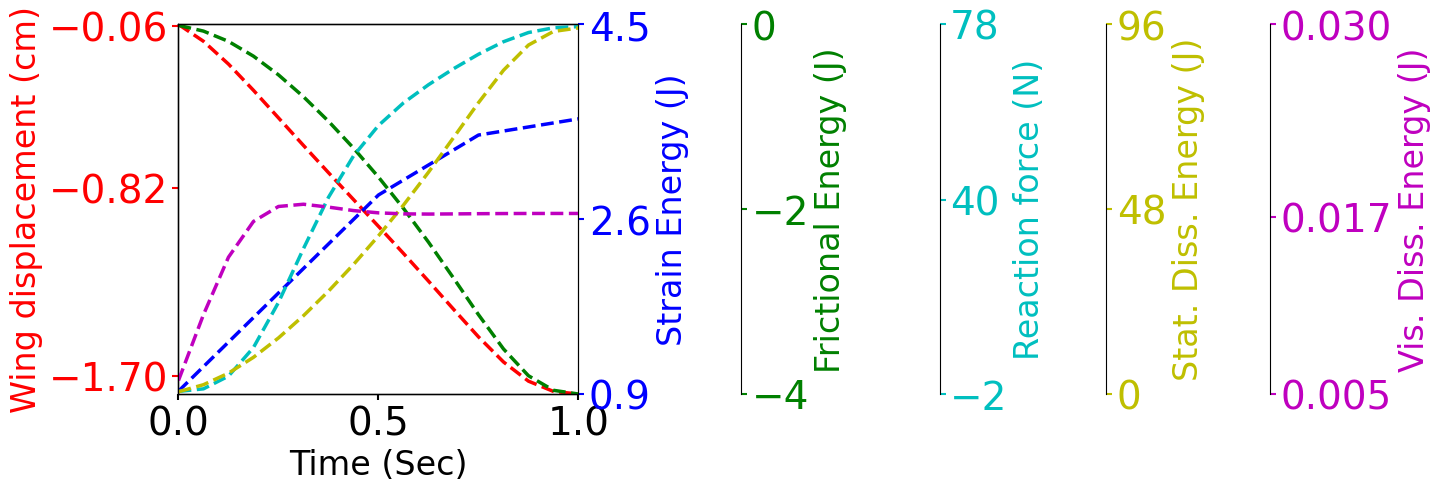

In [20]:
plot(df1, df2,df3, df4, df5, df6)